In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')

In [4]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [5]:
df.shape

(103, 7)

## Data Cleaning

In [11]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [12]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df.rename(columns = {'Production (Tons)' : 'Production(Tons)'}, inplace = True)
df.rename(columns = {'Production per Person (Kg)' : 'Production_per_person(Kg)'}, inplace = True)
df.rename(columns = {'Acreage (Hectare)' : 'Acerage(Hectare)'}, inplace = True)
df.rename(columns = {'Yield (Kg / Hectare)' : 'Yield(Kg/Hectare)'}, inplace = True)

In [17]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [18]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acerage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [20]:
df[df['Acerage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [21]:
df = df.dropna().reset_index()

In [22]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [24]:
df.drop(['index', 'Unnamed: 0'], axis = 1, inplace = True)

In [25]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [27]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acerage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [28]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_person(Kg)'] = df['Production_per_person(Kg)'].astype(float)
df['Acerage(Hectare)'] = df['Acerage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [29]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acerage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [30]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acerage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate Analysis

In [33]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [34]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

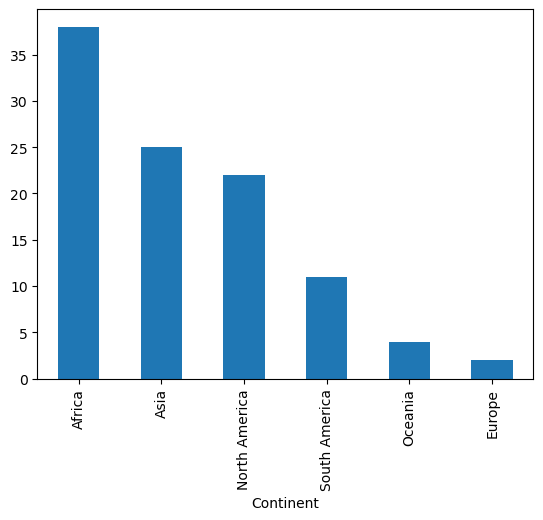

In [35]:
df['Continent'].value_counts().plot(kind = 'bar')

## Distribution of Columns

/var/folders/cd/8_9n_51s38s8yky70rxtcw540000gn/T/ipykernel_1263/3182716453.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
/Users/siddhesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/cd/8_9n_51s38s8yky70rxtcw540000gn/T/ipykernel_1263/3182716453.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot`

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

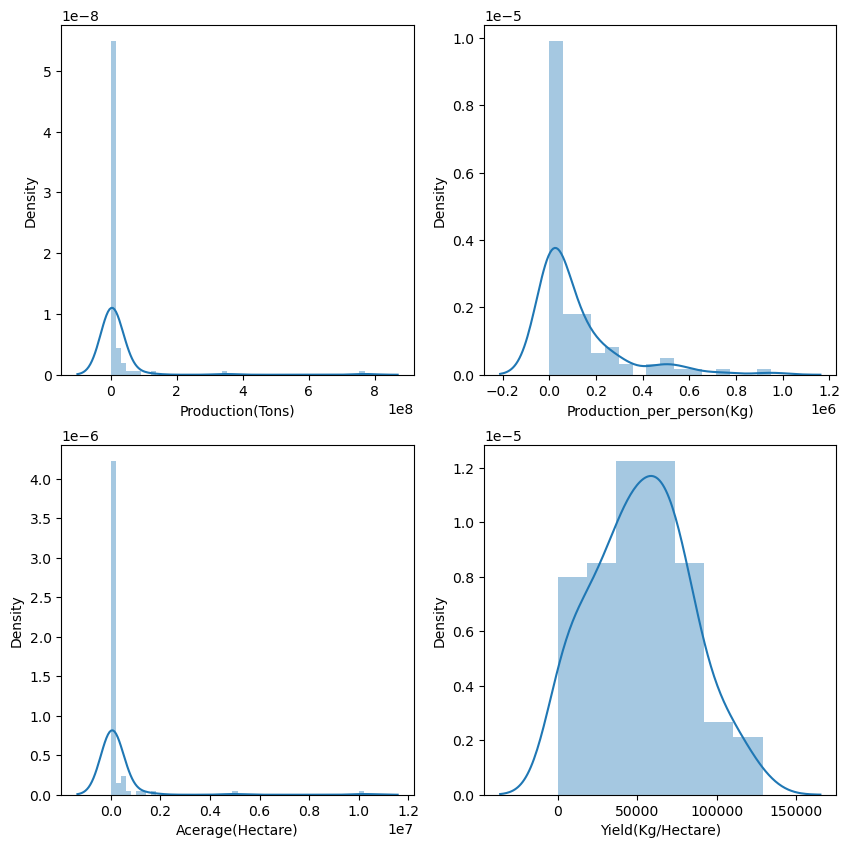

In [36]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])

plt.subplot(2,2,3)
sns.distplot(df['Acerage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

## Checking Outliers

<Axes: >

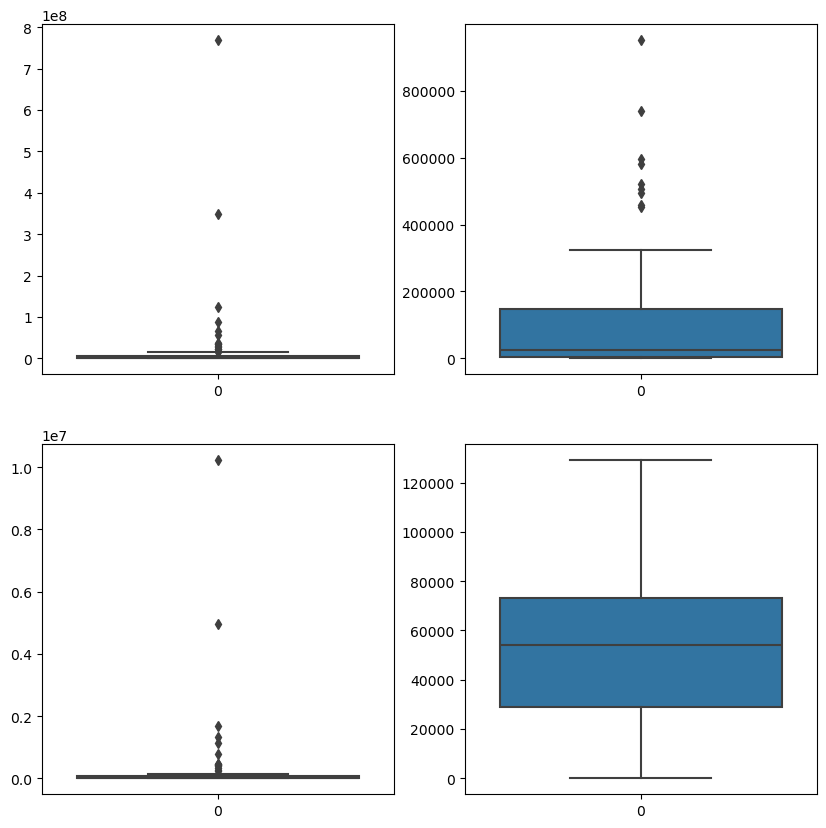

In [37]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])

plt.subplot(2,2,3)
sns.boxplot(df['Acerage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [38]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [39]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [40]:
df_new = df[['Country', 'Production(Tons)']].set_index('Country')

In [41]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [42]:
df_new['Production(Tons)_percent'] = df_new["Production(Tons)"]*100/df_new['Production(Tons)'].sum()

In [43]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

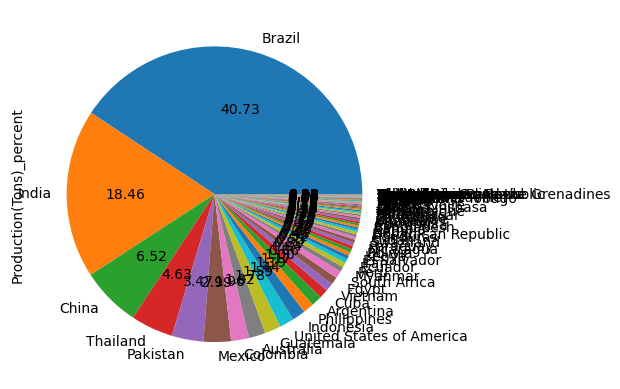

In [44]:
df_new['Production(Tons)_percent'].plot(kind = 'pie', autopct = '%.2f')

<Axes: xlabel='Country'>

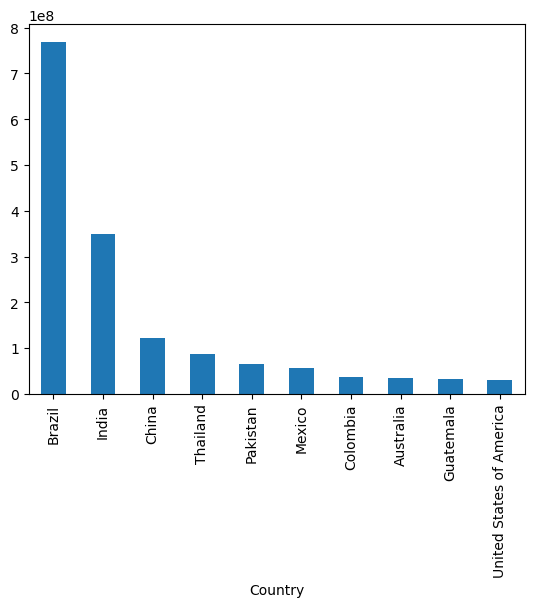

In [47]:
df_new['Production(Tons)'].head(10).plot(kind = 'bar')

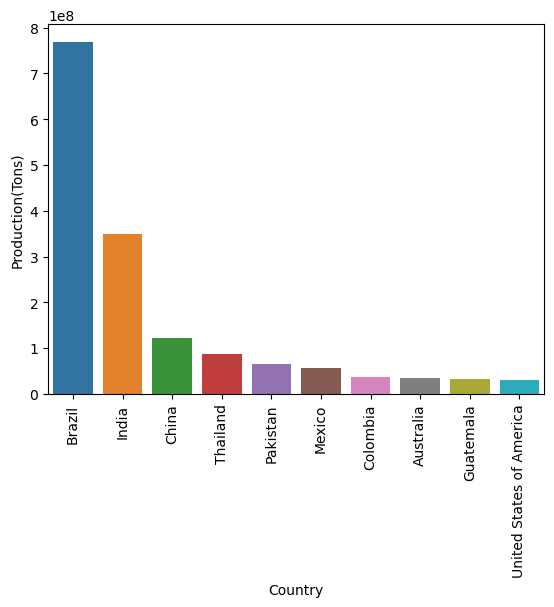

In [48]:
ax = sns.barplot(data=df.head(10), x = 'Country', y = 'Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Which country has highest land?

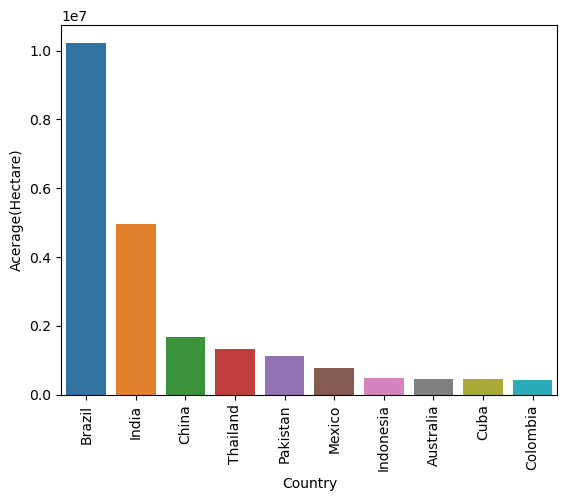

In [53]:
df_acr = df.sort_values('Acerage(Hectare)', ascending=False)
ax = sns.barplot(data=df_acr.head(10), x = 'Country', y = 'Acerage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Which country has highest yield per hectare?

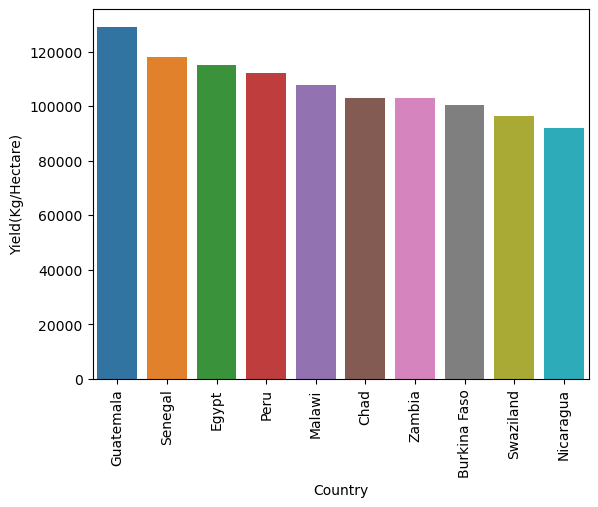

In [55]:
df_yield = df.sort_values('Yield(Kg/Hectare)', ascending=False)
ax = sns.barplot(data=df_yield.head(10), x = 'Country', y = 'Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Which country has highest production per person (Kg)?

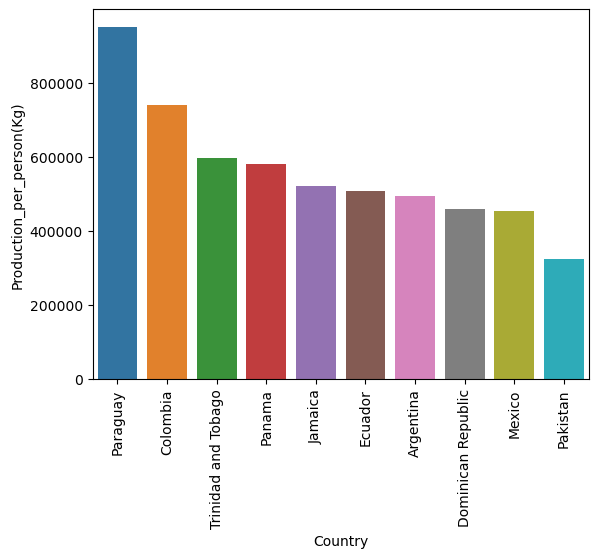

In [57]:
df_ppk = df.sort_values('Production_per_person(Kg)', ascending=False)
ax = sns.barplot(data=df_ppk.head(10), x = 'Country', y = 'Production_per_person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## Correlation

In [59]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acerage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

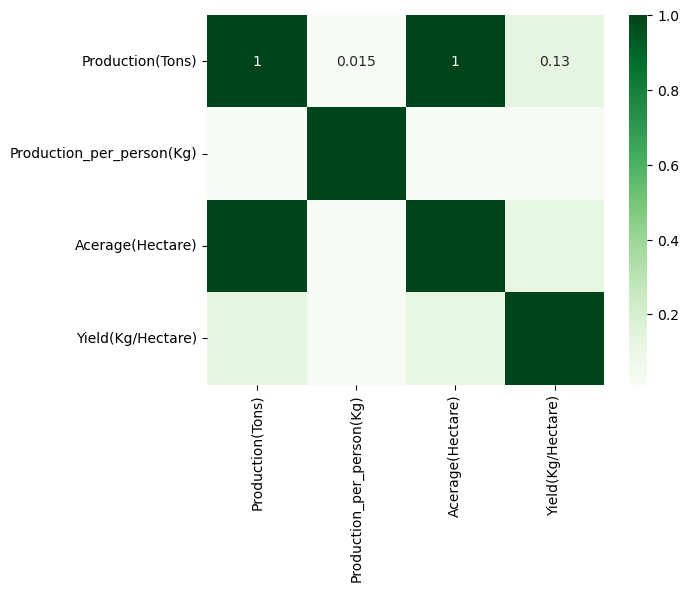

In [64]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acerage(Hectare)', ylabel='Production(Tons)'>

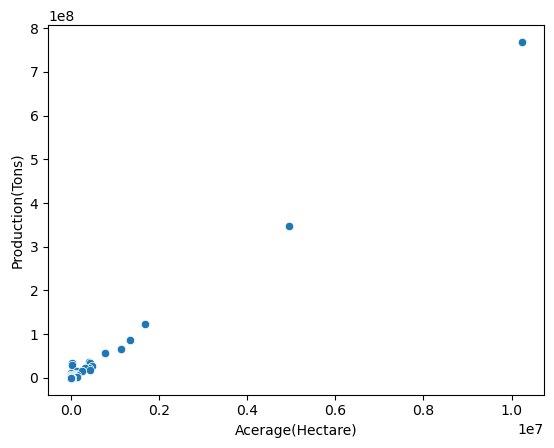

In [68]:
sns.scatterplot(data=df, x = 'Acerage(Hectare)', y = 'Production(Tons)')

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

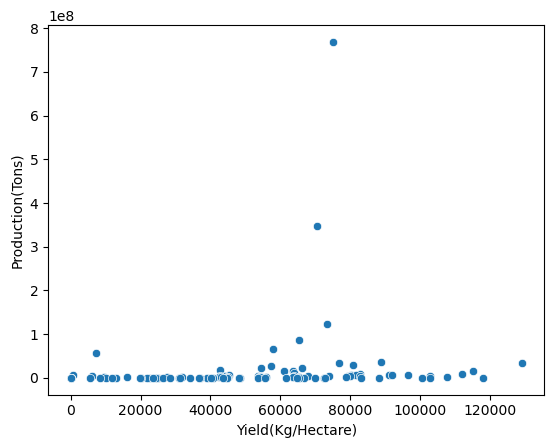

In [69]:
sns.scatterplot(data = df, x = 'Yield(Kg/Hectare)', y = 'Production(Tons)')

# Analysis for Continent

In [72]:
df_continent = df.groupby('Continent').sum(numeric_only=True)

In [73]:
df_continent

,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


## Which continent produces maximum sugarcane?

In [75]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

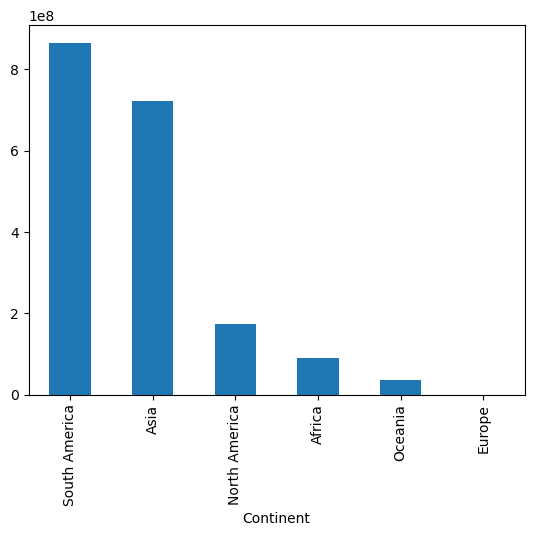

In [74]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind = 'bar')

<Axes: xlabel='Continent'>

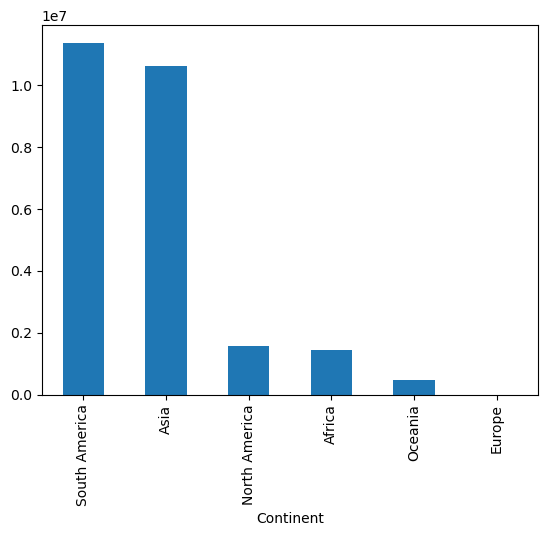

In [77]:
df_continent['Acerage(Hectare)'].sort_values(ascending=False).plot(kind = 'bar')

## Do number of countries in a Continent effects production of sugarcane?

In [79]:
df_continent['number_of_countries'] = df.groupby('Continent').count()['Country']

In [81]:
df_continent

,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


/Users/siddhesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/siddhesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


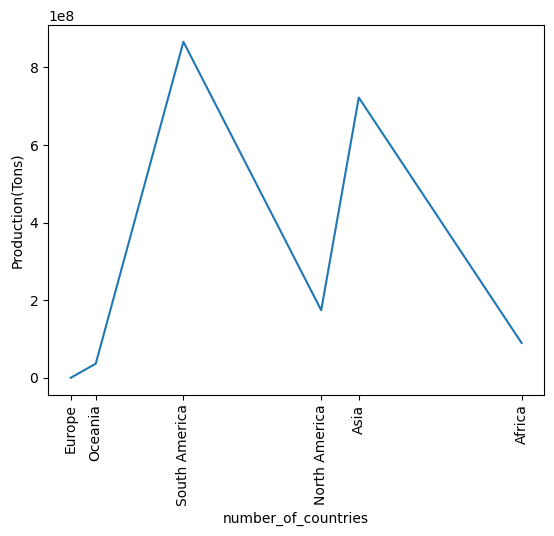

In [80]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent, x = 'number_of_countries', y = 'Production(Tons)')
plt.xticks(df_continent['number_of_countries'], continent_names, rotation = 90)
plt.show()

## Production distribution by continent

<Axes: ylabel='Production(Tons)'>

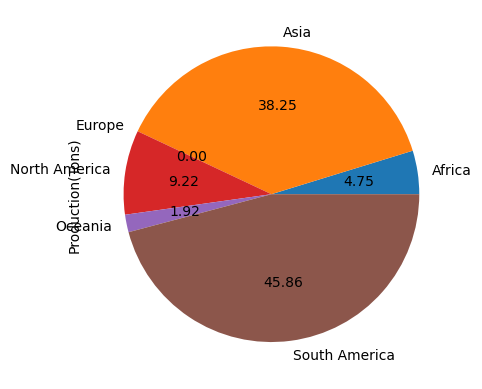

In [84]:
df_continent['Production(Tons)'].plot(kind = 'pie', autopct = '%.2f')

## Correlation for continent

In [82]:
df_continent.corr()

,Production(Tons),Production_per_person(Kg),Acerage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acerage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
